In [1]:
import numpy as np
import pandas as pd
import neurokit2 as nk
from entropy import *
import matplotlib.pyplot as plt
from timer import Timer

# Simutation Data
### Generate signal

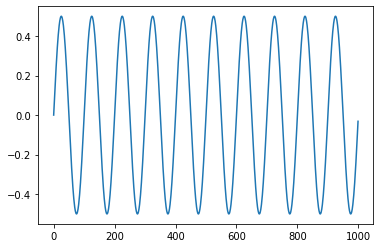

In [2]:
signal = nk.signal_simulate(frequency=1, sampling_rate=100)
plt.plot(signal)

In [3]:
def analyse(signal, entropy):
    parameters = nk.complexity_optimize(signal) # find optimal time delay, embedding dimension and r
    if entropy == 'sample':
        return nk.entropy_sample(signal, delay=parameters['delay'], dimension=parameters['dimension'], r=parameters['r'])
    elif entropy == 'fuzzy':
        return nk.entropy_fuzzy(signal, delay=parameters['delay'], dimension=parameters['dimension'], r=parameters['r'])
    elif entropy == 'approx':
        return nk.entropy_approximate(signal, delay=parameters['delay'], dimension=parameters['dimension'], r=parameters['r'])
    elif entropy == 'permutation':
        return perm_entropy(signal, order=parameters['dimension'], delay=parameters['delay'])
    elif entropy == 'dispersion':
        return dispersion_entropy(signal, 4, parameters['dimension'], parameters['delay'])
    else:
        return nk.entropy_multiscale(signal)

t = Timer()
def print_values(signal):
    measures = ['approx', 'sample', 'fuzzy', 'multiscale', 'permutation', 'dispersion']
    for m in measures:
        t.start()
        print(f"{m} ent: ", analyse(signal, m))
        t.stop()

Observations:
- Small entropy values because the series is regular and less random

In [4]:
print_values(signal)

approx ent:  0.08603018625878978
Elapsed time: 0.9564 seconds
sample ent:  0.10251863419385274
Elapsed time: 0.9575 seconds
fuzzy ent:  0.1374268399968521
Elapsed time: 0.9808 seconds
multiscale ent:  0.2110351418455716
Elapsed time: 0.9702 seconds
permutation ent:  2.456123443308068
Elapsed time: 0.9513 seconds
dispersion ent:  2.8260968896029186
Elapsed time: 1.0176 seconds


Generate a signal with some noise

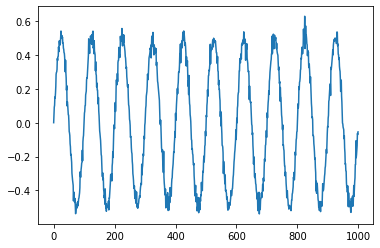

In [5]:
signal_with_noise = nk.signal_simulate(frequency=1, noise = 0.02, sampling_rate=100)
plt.plot(signal_with_noise)

In [6]:
print_values(signal_with_noise)

approx ent:  0.2720137384116974
Elapsed time: 1.4934 seconds
sample ent:  0.36890840368408473
Elapsed time: 1.4911 seconds
fuzzy ent:  0.3085254907136019
Elapsed time: 1.5160 seconds
multiscale ent:  0.25712150031540476
Elapsed time: 1.5054 seconds
permutation ent:  4.382403184124721
Elapsed time: 1.4898 seconds
dispersion ent:  3.1549886336765205
Elapsed time: 1.5579 seconds


Observations:
- Other single-scale entropy values increase significantly with the presence of noise except for
1. Multiscale Entropy - which is supposed to give lower values to uncorrelated random/unpredictable signals (noisy signals)
2. Dispersion Entropy

Generate a signal with higher frequency

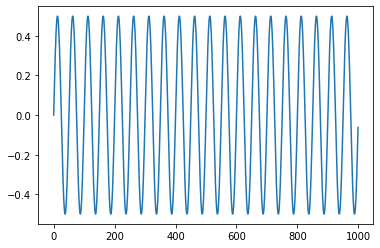

In [7]:
signal_higher_frequency = nk.signal_simulate(frequency=2, sampling_rate=100)
plt.plot(signal_higher_frequency)

In [8]:
print_values(signal_higher_frequency)

approx ent:  0.27572107519111055
Elapsed time: 0.9419 seconds
sample ent:  0.26378698320983096
Elapsed time: 0.9410 seconds
fuzzy ent:  0.47042235780870867
Elapsed time: 0.9680 seconds
multiscale ent:  0.15536525203558546
Elapsed time: 0.9512 seconds
permutation ent:  0.9995619808790666
Elapsed time: 0.9356 seconds
dispersion ent:  1.6600842050121316
Elapsed time: 1.0114 seconds


Observations:
- AppEnt, SampEnt, FuzzyEnt increase
- MultiscaleEnt, PermEnt, DispersionEnt decrease

# Actual Data

Resting state data (Neurokit datasets https://neurokit2.readthedocs.io/en/latest/datasets.html)

It contains 5 minutes of physiological signals recorded at a frequency of 100Hz (5 x 60 x 100 = 30000 data points).

Contains ECG, PPG, RSP

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/master/data/bio_resting_5min_100hz.csv")

data

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669
...,...,...,...
29995,-0.045986,-0.135498,0.981111
29996,-0.107841,-0.155334,0.978866
29997,-0.058274,-0.173721,0.976366
29998,-0.056472,-0.192108,0.972202


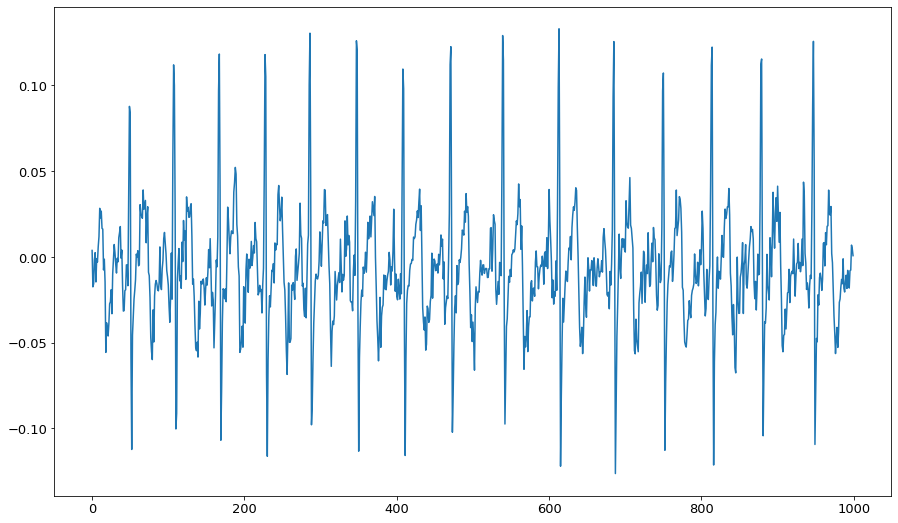

In [10]:
plt.plot(data["ECG"][:1000])

Preprocess the signal to extract ECG (heart) and RSP (breathing) features. We select just 3000 datapoints (30s) to visualize

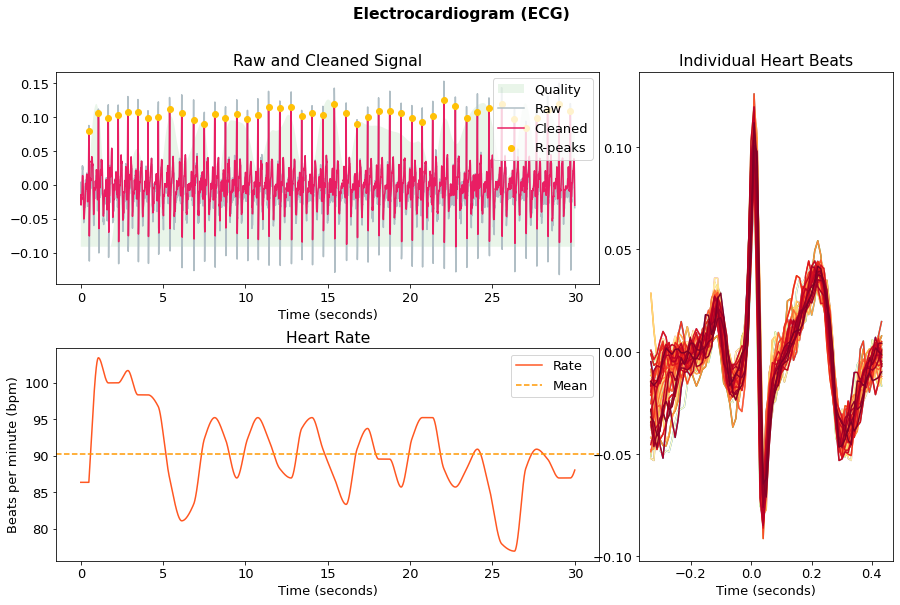

In [11]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)
plot = nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

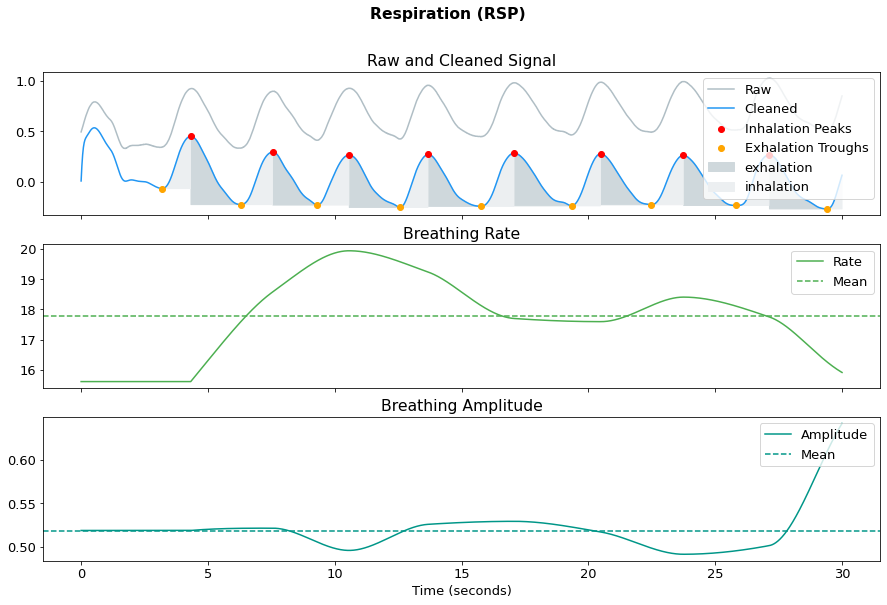

In [12]:
# Process rsp
rsp_signals, info = nk.rsp_process(data["RSP"], sampling_rate=100)
plot = nk.rsp_plot(rsp_signals[:3000], sampling_rate=100)

Extract Features for ECG

In [13]:
features = nk.ecg_intervalrelated(ecg_signals)
features

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,86.392105,3.883777,69.475638,4.903604,3.888256,0.07058,0.055901,69.0,4.4478,0.064461,...,0.542658,0.457342,4.676883,4.293525,0.531295,0.468705,3.565916,3.349293,0.796565,1.978637


In [14]:
features.columns

Index(['ECG_Rate_Mean', 'HRV_RMSSD', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDSD',
       'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN',
       'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_TINN', 'HRV_HTI', 'HRV_ULF',
       'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn',
       'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S',
       'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS',
       'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d',
       'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d',
       'HRV_SD2a', 'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_ApEn',
       'HRV_SampEn'],
      dtype='object')

In [15]:
features['HRV_ApEn']

0    0.796565
Name: HRV_ApEn, dtype: float64

In [16]:
features['HRV_SampEn']

0    1.978637
Name: HRV_SampEn, dtype: float64

Extract Features for RSP

In [19]:
nk.rsp_intervalrelated(rsp_signals)

,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,...,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_2
0,15.735302,0.400445,119.691326,384.173333,100.662988,120.504248,0.262025,0.311556,371.0,57.8214,...,0.126552,NaN,NaN,NaN,85.209371,114.041384,1.338367,0.717675,1.504077,0.618535
